# Introduction

This notebook aims to analyze the Aviation Accident Database & Synopses, up to 2023, to identify the lowest-risk aircraft for a company looking to diversify its portfolio by purchasing and operating airplanes for commercial and private enterprises. 
The goal is to provide actionable insights to the head of the new aviation division to inform their decision-making process.

# Business Understanding

## (a). Main Objective

The main objective of this project is to identify the safest airplane for the company to purchase and operate, thereby minimizing potential risks and ensuring a successful entry into the aviation industry.

## (b). Specific Objectives

The specific objectives of this project are:

**(i)  Data Analysis:** Analyze the Aviation Accident Database & Synopses to identify the aircraft with the lowest accident rates and fatalities.

**(ii) Risk Assessment:** Assess the risks associated with each aircraft, considering factors such as accident rates, fatalities, and other relevant metrics.

**(iii) Insight Generation:** Generate actionable insights from the analysis and risk assessment to inform the head of the new aviation division's decision-making process.

# Data Understanding

The Aviation Accident Database & Synopses, up to 2023, contains detailed information on aviation accidents and incidents. The dataset includes variables such as:

1. **Aircraft Type:** The type of aircraft involved in the accident.
2. **Accident Date:** The date of the accident.
3. **Fatalities:** The number of fatalities resulting from the accident.
4. **Injuries:** The number of injuries resulting from the accident.
5. **Accident Type:** The type of accident (e.g., crash, fire, etc.)



By analyzing this dataset, we can gain valuable insights into the safety records of different aircraft types and make informed decisions about which aircraft to purchase and operate.

# Data Importation

In [1]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style("whitegrid")

In [2]:
# load the data

Aviation_df= pd.read_csv("AviationData.csv")

In [3]:
#See the data that's been imported
# First 5 rows
Aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
#Preliminary investigation of the data
Aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4414 entries, 0 to 4413
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                4414 non-null   object 
 1   Investigation.Type      4414 non-null   object 
 2   Accident.Number         4414 non-null   object 
 3   Event.Date              4414 non-null   object 
 4   Location                4413 non-null   object 
 5   Country                 4398 non-null   object 
 6   Latitude                4 non-null      float64
 7   Longitude               4 non-null      float64
 8   Airport.Code            2187 non-null   object 
 9   Airport.Name            2725 non-null   object 
 10  Injury.Severity         4414 non-null   object 
 11  Aircraft.damage         4342 non-null   object 
 12  Aircraft.Category       3569 non-null   object 
 13  Registration.Number     4414 non-null   object 
 14  Make                    4408 non-null   

In [5]:
#Getting the number of rows and columns
Aviation_df.shape

(4414, 31)

# Data Wrangling


For this analysis we will tailor our dataframe by focusing on a specific number of variables of interest, out of the 31 variables we will focus on:

    1. Aircraft.Category 
    2. Make 
    3. Model
    4. Number.of.Engines
    5. Engine.Type
    6. Amateur.Built
    7. Injury.Severity
    8. Total.Fatal.Injuries
    9. Aircraft.damage
    10. Purpose.of.flight
    11. Broad.phase.of.flight
    12. Weather.Condition

In [6]:
#creating a new dataframe that focuses on the variables of interest.

Studydata_df = Aviation_df.loc[:,("Aircraft.Category","Make","Model","Number.of.Engines","Engine.Type","Amateur.Built","Injury.Severity","Total.Fatal.Injuries","Aircraft.damage","Purpose.of.flight","Broad.phase.of.flight","Weather.Condition")]
Studydata_df.head()

,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Amateur.Built,Injury.Severity,Total.Fatal.Injuries,Aircraft.damage,Purpose.of.flight,Broad.phase.of.flight,Weather.Condition
0,NaN,Stinson,108-3,1.0,Reciprocating,No,Fatal(2),2.0,Destroyed,Personal,Cruise,UNK
1,NaN,Piper,PA24-180,1.0,Reciprocating,No,Fatal(4),4.0,Destroyed,Personal,Unknown,UNK
2,NaN,Cessna,172M,1.0,Reciprocating,No,Fatal(3),3.0,Destroyed,Personal,Cruise,IMC
3,NaN,Rockwell,112,1.0,Reciprocating,No,Fatal(2),2.0,Destroyed,Personal,Cruise,IMC
4,NaN,Cessna,501,NaN,NaN,No,Fatal(1),1.0,Destroyed,Personal,Approach,VMC


In [7]:
# Investigation of the data
Studydata_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4414 entries, 0 to 4413
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Aircraft.Category      3569 non-null   object 
 1   Make                   4408 non-null   object 
 2   Model                  4400 non-null   object 
 3   Number.of.Engines      4402 non-null   float64
 4   Engine.Type            4412 non-null   object 
 5   Amateur.Built          4413 non-null   object 
 6   Injury.Severity        4414 non-null   object 
 7   Total.Fatal.Injuries   4385 non-null   float64
 8   Aircraft.damage        4342 non-null   object 
 9   Purpose.of.flight      4407 non-null   object 
 10  Broad.phase.of.flight  4410 non-null   object 
 11  Weather.Condition      4413 non-null   object 
dtypes: float64(2), object(10)
memory usage: 413.9+ KB


In [8]:
# Getting the values present in the Aircraft.Category
Studydata_df["Aircraft.Category"].value_counts(dropna= False)

Aircraft.Category
Airplane      3180
NaN            845
Helicopter     289
Glider          53
Balloon         30
Gyrocraft       15
Ultralight       1
Unknown          1
Name: count, dtype: int64

In [9]:
# Considering the company is interested in only purchasing airplanes it is safe to drop all other values that are not airplanes in the Aircraft.Category

Filtered_df = Studydata_df[Studydata_df['Aircraft.Category'] == 'Airplane'].reset_index(drop=True)
Filtered_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Aircraft.Category      3180 non-null   object 
 1   Make                   3175 non-null   object 
 2   Model                  3168 non-null   object 
 3   Number.of.Engines      3180 non-null   float64
 4   Engine.Type            3180 non-null   object 
 5   Amateur.Built          3179 non-null   object 
 6   Injury.Severity        3180 non-null   object 
 7   Total.Fatal.Injuries   3162 non-null   float64
 8   Aircraft.damage        3135 non-null   object 
 9   Purpose.of.flight      3176 non-null   object 
 10  Broad.phase.of.flight  3178 non-null   object 
 11  Weather.Condition      3180 non-null   object 
dtypes: float64(2), object(10)
memory usage: 298.3+ KB


In [10]:
# Seeing the first ten rows of the dataframe
Filtered_df.head(10)

,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Amateur.Built,Injury.Severity,Total.Fatal.Injuries,Aircraft.damage,Purpose.of.flight,Broad.phase.of.flight,Weather.Condition
0,Airplane,Mcdonnell Douglas,DC9,2.0,Turbo Fan,No,Non-Fatal,NaN,Substantial,NaN,Climb,VMC
1,Airplane,Cessna,140,1.0,Reciprocating,No,Non-Fatal,0.0,Substantial,Personal,Takeoff,VMC
2,Airplane,Cessna,401B,2.0,Reciprocating,No,Non-Fatal,0.0,Substantial,Business,Landing,IMC
3,Airplane,Bellanca,17-30A,1.0,Reciprocating,No,Non-Fatal,0.0,Destroyed,Personal,Cruise,IMC
4,Airplane,Cessna,R172K,1.0,Reciprocating,No,Fatal(1),1.0,Destroyed,Personal,Takeoff,IMC
5,Airplane,Navion,A,1.0,Reciprocating,No,Fatal(1),1.0,Destroyed,Personal,Cruise,IMC
6,Airplane,Beech,19,1.0,Reciprocating,No,Fatal(2),2.0,Destroyed,Personal,Cruise,IMC
7,Airplane,Cessna,180,1.0,Reciprocating,No,Fatal(3),3.0,Destroyed,Personal,Unknown,VMC
8,Airplane,Cessna,172,1.0,Reciprocating,No,Non-Fatal,0.0,Substantial,Personal,Taxi,VMC
9,Airplane,Cessna,152,1.0,Reciprocating,No,Non-Fatal,0.0,Substantial,Instructional,Takeoff,VMC


In [11]:
#Now that all the values in the Aircraft category are similar, we can drop this column as we already know that the remaining info pertains to airplanes,

Filtered_df = Filtered_df.copy()
Filtered_df.drop(["Aircraft.Category"], axis=1,inplace = True)
Filtered_df.head(10)

,Make,Model,Number.of.Engines,Engine.Type,Amateur.Built,Injury.Severity,Total.Fatal.Injuries,Aircraft.damage,Purpose.of.flight,Broad.phase.of.flight,Weather.Condition
0,Mcdonnell Douglas,DC9,2.0,Turbo Fan,No,Non-Fatal,NaN,Substantial,NaN,Climb,VMC
1,Cessna,140,1.0,Reciprocating,No,Non-Fatal,0.0,Substantial,Personal,Takeoff,VMC
2,Cessna,401B,2.0,Reciprocating,No,Non-Fatal,0.0,Substantial,Business,Landing,IMC
3,Bellanca,17-30A,1.0,Reciprocating,No,Non-Fatal,0.0,Destroyed,Personal,Cruise,IMC
4,Cessna,R172K,1.0,Reciprocating,No,Fatal(1),1.0,Destroyed,Personal,Takeoff,IMC
5,Navion,A,1.0,Reciprocating,No,Fatal(1),1.0,Destroyed,Personal,Cruise,IMC
6,Beech,19,1.0,Reciprocating,No,Fatal(2),2.0,Destroyed,Personal,Cruise,IMC
7,Cessna,180,1.0,Reciprocating,No,Fatal(3),3.0,Destroyed,Personal,Unknown,VMC
8,Cessna,172,1.0,Reciprocating,No,Non-Fatal,0.0,Substantial,Personal,Taxi,VMC
9,Cessna,152,1.0,Reciprocating,No,Non-Fatal,0.0,Substantial,Instructional,Takeoff,VMC


Now that we have a dataframe that gives information on airplanes, we want to combine the make and model columns to enable us to identify a specific airplane type.
Before we combine both the columns, we have to ensure that they are of equal length, let's check the number of missing values each column contains

In [12]:
# Checking the number of missing values in the Make Column
Filtered_df["Make"].isna().sum()

5

In [13]:
# Checking the number of missing values in the Model Column
Filtered_df["Model"].isna().sum()

12

 To make both columns the same length, we will drop the rows with missing values from the dataframe.

In [14]:
# Dropping the missing values from the specific columns
Filtered_df = Filtered_df.dropna(subset=["Make", "Model"])
Filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3163 entries, 0 to 3179
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make                   3163 non-null   object 
 1   Model                  3163 non-null   object 
 2   Number.of.Engines      3163 non-null   float64
 3   Engine.Type            3163 non-null   object 
 4   Amateur.Built          3162 non-null   object 
 5   Injury.Severity        3163 non-null   object 
 6   Total.Fatal.Injuries   3145 non-null   float64
 7   Aircraft.damage        3118 non-null   object 
 8   Purpose.of.flight      3159 non-null   object 
 9   Broad.phase.of.flight  3161 non-null   object 
 10  Weather.Condition      3163 non-null   object 
dtypes: float64(2), object(9)
memory usage: 296.5+ KB


In [15]:
# The "Make" and "Model" columns now have equal lengths and we can go ahead and combine them.

Filtered_df['Airplane_Model'] = Filtered_df['Make'] + ' ' + Filtered_df['Model']

#Next we shall drop the individual "Make" and "Model" columns.

Filtered_df = Filtered_df.drop(["Make","Model"], axis = 1)

#Let's see the data

Filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3163 entries, 0 to 3179
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Number.of.Engines      3163 non-null   float64
 1   Engine.Type            3163 non-null   object 
 2   Amateur.Built          3162 non-null   object 
 3   Injury.Severity        3163 non-null   object 
 4   Total.Fatal.Injuries   3145 non-null   float64
 5   Aircraft.damage        3118 non-null   object 
 6   Purpose.of.flight      3159 non-null   object 
 7   Broad.phase.of.flight  3161 non-null   object 
 8   Weather.Condition      3163 non-null   object 
 9   Airplane_Model         3163 non-null   object 
dtypes: float64(2), object(8)
memory usage: 271.8+ KB


In [16]:
#Cleaning the Injury.Severity Column

def clean_injury_severity(label):
    if label.startswith('Fatal'):
        return 'Fatal'
    else:
        return label
Filtered_df['Injury.Severity'] = Filtered_df['Injury.Severity'].apply(clean_injury_severity)
Filtered_df['Injury.Severity'].value_counts()


Injury.Severity
Non-Fatal    2465
Fatal         582
Incident      116
Name: count, dtype: int64

In [17]:
# The number of missing values is less than ten percent of the dataframe, hence we shall drop all rows with missing values.

Filtered_df = Filtered_df.dropna()
Filtered_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3099 entries, 1 to 3178
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Number.of.Engines      3099 non-null   float64
 1   Engine.Type            3099 non-null   object 
 2   Amateur.Built          3099 non-null   object 
 3   Injury.Severity        3099 non-null   object 
 4   Total.Fatal.Injuries   3099 non-null   float64
 5   Aircraft.damage        3099 non-null   object 
 6   Purpose.of.flight      3099 non-null   object 
 7   Broad.phase.of.flight  3099 non-null   object 
 8   Weather.Condition      3099 non-null   object 
 9   Airplane_Model         3099 non-null   object 
dtypes: float64(2), object(8)
memory usage: 266.3+ KB


In [18]:
# Check for duplicates

duplicates = Filtered_df[Filtered_df.duplicated()]
duplicates

,Number.of.Engines,Engine.Type,Amateur.Built,Injury.Severity,Total.Fatal.Injuries,Aircraft.damage,Purpose.of.flight,Broad.phase.of.flight,Weather.Condition,Airplane_Model
46,1.0,Reciprocating,No,Non-Fatal,0.0,Substantial,Instructional,Takeoff,VMC,Cessna 152
102,1.0,Reciprocating,No,Non-Fatal,0.0,Substantial,Instructional,Cruise,VMC,Cessna 152
117,1.0,Reciprocating,No,Non-Fatal,0.0,Substantial,Instructional,Landing,VMC,Cessna 152
144,1.0,Reciprocating,No,Non-Fatal,0.0,Substantial,Personal,Landing,VMC,Cessna 172
152,1.0,Reciprocating,No,Non-Fatal,0.0,Substantial,Instructional,Landing,VMC,Cessna 152
...,...,...,...,...,...,...,...,...,...,...
3169,1.0,Reciprocating,No,Non-Fatal,0.0,Substantial,Personal,Landing,VMC,Piper PA-28-161
3170,1.0,Reciprocating,No,Non-Fatal,0.0,Substantial,Personal,Landing,VMC,Cessna 172
3172,1.0,Reciprocating,No,Non-Fatal,0.0,Substantial,Instructional,Takeoff,VMC,Cessna 152
3175,1.0,Reciprocating,No,Non-Fatal,0.0,Substantial,Unknown,Takeoff,VMC,Piper PA-32


In [19]:
# removing duplicates

Filtered_df.drop_duplicates(keep='first', inplace=True)

# Investigating the data frame
Filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2474 entries, 1 to 3174
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Number.of.Engines      2474 non-null   float64
 1   Engine.Type            2474 non-null   object 
 2   Amateur.Built          2474 non-null   object 
 3   Injury.Severity        2474 non-null   object 
 4   Total.Fatal.Injuries   2474 non-null   float64
 5   Aircraft.damage        2474 non-null   object 
 6   Purpose.of.flight      2474 non-null   object 
 7   Broad.phase.of.flight  2474 non-null   object 
 8   Weather.Condition      2474 non-null   object 
 9   Airplane_Model         2474 non-null   object 
dtypes: float64(2), object(8)
memory usage: 212.6+ KB


#### Checking for Validity

In [20]:
# checking datatypes. 

Filtered_df.dtypes

Number.of.Engines        float64
Engine.Type               object
Amateur.Built             object
Injury.Severity           object
Total.Fatal.Injuries     float64
Aircraft.damage           object
Purpose.of.flight         object
Broad.phase.of.flight     object
Weather.Condition         object
Airplane_Model            object
dtype: object

In [21]:
# Fixing datatypes (Convert Number.of.Engines to intergers as it is likely to be a whole number)

Filtered_df["Number.of.Engines"] = Filtered_df["Number.of.Engines"].astype(int)
Filtered_df["Total.Fatal.Injuries"] = Filtered_df["Total.Fatal.Injuries"].astype(int)
#Checking the data

Filtered_df.dtypes

Number.of.Engines         int32
Engine.Type              object
Amateur.Built            object
Injury.Severity          object
Total.Fatal.Injuries      int32
Aircraft.damage          object
Purpose.of.flight        object
Broad.phase.of.flight    object
Weather.Condition        object
Airplane_Model           object
dtype: object

In [22]:
#Checking for outliers

Filtered_df.describe()

,Number.of.Engines,Total.Fatal.Injuries
count,2474.000000,2474.000000
mean,1.195635,0.475748
std,0.427196,1.153248
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,4.000000,14.000000


#### Uniformity

In [23]:
# Renaming the columns
Filtered_df = Filtered_df.rename(columns=lambda x: x.replace('.', '_'))

# Seeing the changes
Filtered_df.columns

Index(['Number_of_Engines', 'Engine_Type', 'Amateur_Built', 'Injury_Severity',
       'Total_Fatal_Injuries', 'Aircraft_damage', 'Purpose_of_flight',
       'Broad_phase_of_flight', 'Weather_Condition', 'Airplane_Model'],
      dtype='object')

In [24]:
# Reordering the columns so that "Airplane_Model" is the first column in the dataframe

current_columns = ['Number_of_Engines', 'Engine_Type', 'Amateur_Built', 'Injury_Severity','Total_Fatal_Injuries','Aircraft_damage', 'Purpose_of_flight', 'Broad_phase_of_flight','Weather_Condition', 'Airplane_Model']
new_order = ['Airplane_Model'] + [col for col in current_columns if col != 'Airplane_Model']

Filtered_df= Filtered_df[new_order]

#Reset the index
Filtered_df = Filtered_df.reset_index(drop=True)

Filtered_df.head(10)


,Airplane_Model,Number_of_Engines,Engine_Type,Amateur_Built,Injury_Severity,Total_Fatal_Injuries,Aircraft_damage,Purpose_of_flight,Broad_phase_of_flight,Weather_Condition
0,Cessna 140,1,Reciprocating,No,Non-Fatal,0,Substantial,Personal,Takeoff,VMC
1,Cessna 401B,2,Reciprocating,No,Non-Fatal,0,Substantial,Business,Landing,IMC
2,Bellanca 17-30A,1,Reciprocating,No,Non-Fatal,0,Destroyed,Personal,Cruise,IMC
3,Cessna R172K,1,Reciprocating,No,Fatal,1,Destroyed,Personal,Takeoff,IMC
4,Navion A,1,Reciprocating,No,Fatal,1,Destroyed,Personal,Cruise,IMC
5,Beech 19,1,Reciprocating,No,Fatal,2,Destroyed,Personal,Cruise,IMC
6,Cessna 180,1,Reciprocating,No,Fatal,3,Destroyed,Personal,Unknown,VMC
7,Cessna 172,1,Reciprocating,No,Non-Fatal,0,Substantial,Personal,Taxi,VMC
8,Cessna 152,1,Reciprocating,No,Non-Fatal,0,Substantial,Instructional,Takeoff,VMC
9,Cessna 150L,1,Reciprocating,No,Non-Fatal,0,Substantial,Personal,Approach,VMC


In [25]:
# Checking the values present in the Purpose of flight columns
Filtered_df["Purpose_of_flight"].value_counts()

Purpose_of_flight
Personal               1351
Unknown                 424
Business                260
Instructional           228
Aerial Application       90
Ferry                    63
Executive/corporate      44
Aerial Observation        9
Public Aircraft           3
Skydiving                 2
Name: count, dtype: int64

# Univariate Plot Section

This section looks into the risks associated with different airplane accidents. This will lay the groundwork for covering further analysis , allowing us to identify the airplane model with the lowest risk.dsa 

### Injury_Severity

Our first variable of interest is the Injury_Severity. 

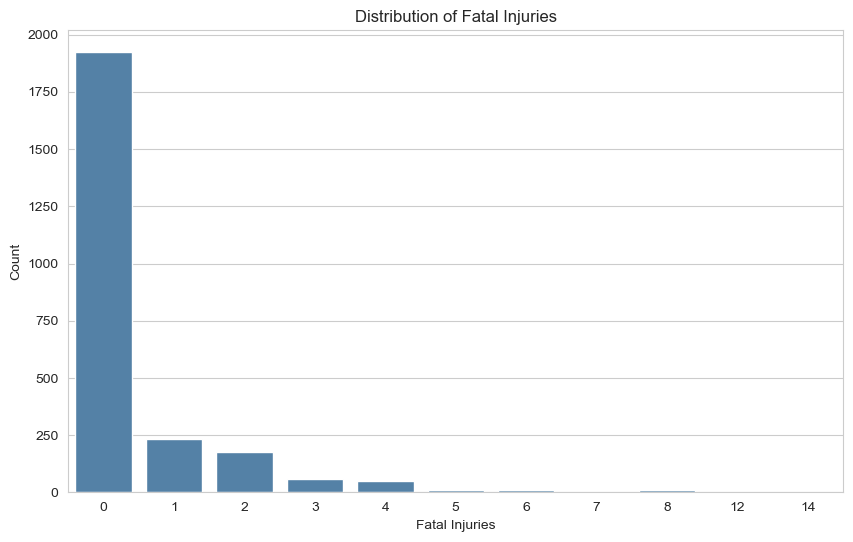

In [26]:
# Create a bar plot for Fatal_Injuries

plt.figure(figsize=(10, 6))
sns.countplot(data=Filtered_df, x='Total_Fatal_Injuries', color = 'steelblue')
plt.title('Distribution of Fatal Injuries')
plt.xlabel('Fatal Injuries')
plt.ylabel('Count')
plt.xticks()
plt.show()


According to the plot, most of the accidents related were Non-Fatal

### Aircraft Damage in Aviation Incidents

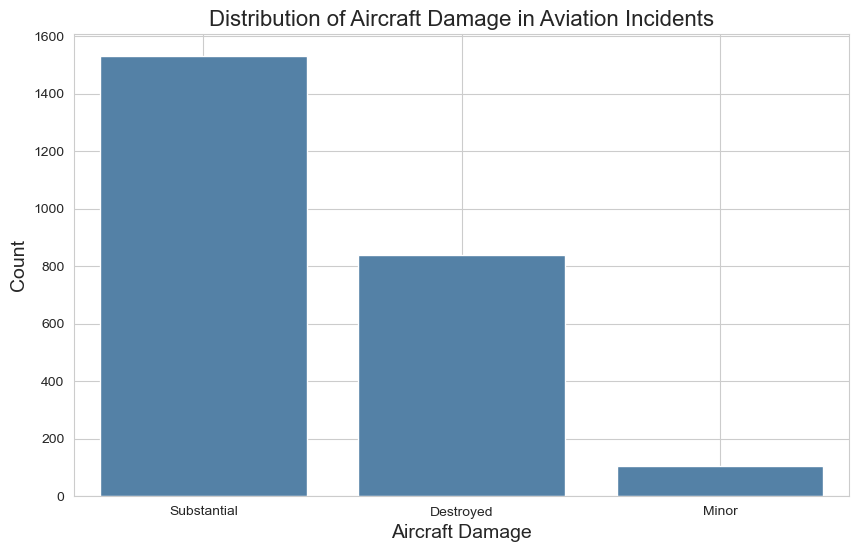

In [27]:
# creating a bar plot for Aircraft Damage

plt.figure(figsize=(10, 6))
sns.countplot(data=Filtered_df, x='Aircraft_damage', order=Filtered_df['Aircraft_damage'].value_counts().index, color= 'steelblue')
plt.title('Distribution of Aircraft Damage in Aviation Incidents', fontsize=16)
plt.xlabel('Aircraft Damage', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks()
plt.grid(axis='x')
plt.show()


According to the plot, Airplanes involved in most accidents had sustantial damage.

### Purpose of Flight

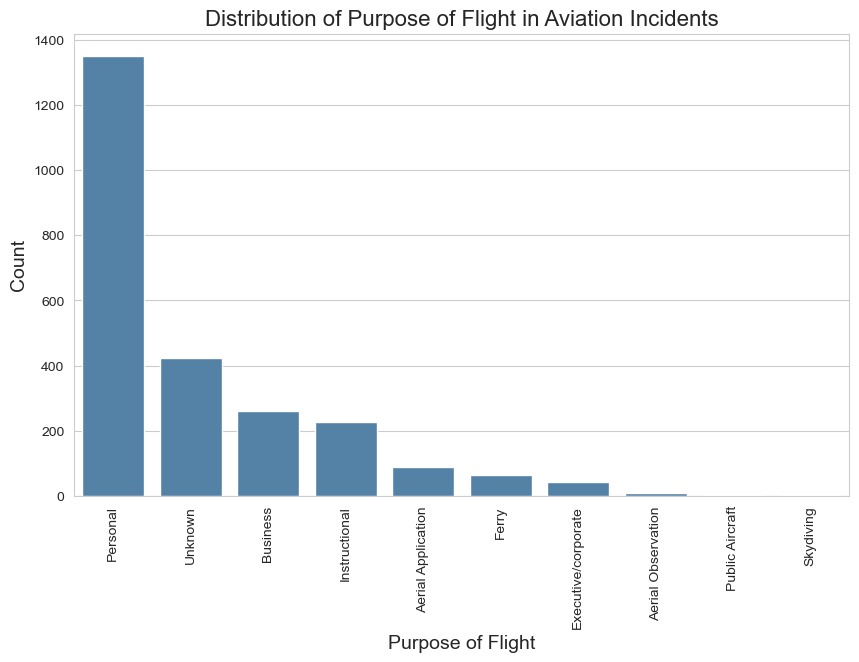

In [28]:
# Creating a bar plot for Purpose of flight in Aviation Incidents

plt.figure(figsize=(10, 6))
sns.countplot(data=Filtered_df, x='Purpose_of_flight', order=Filtered_df['Purpose_of_flight'].value_counts().index,color= "steelblue")
plt.title('Distribution of Purpose of Flight in Aviation Incidents', fontsize=16)
plt.xlabel('Purpose of Flight', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)
plt.show()


According to the plot most accidents occurred when the airplanes were used for personal flights.

### Broad Phase of Flight

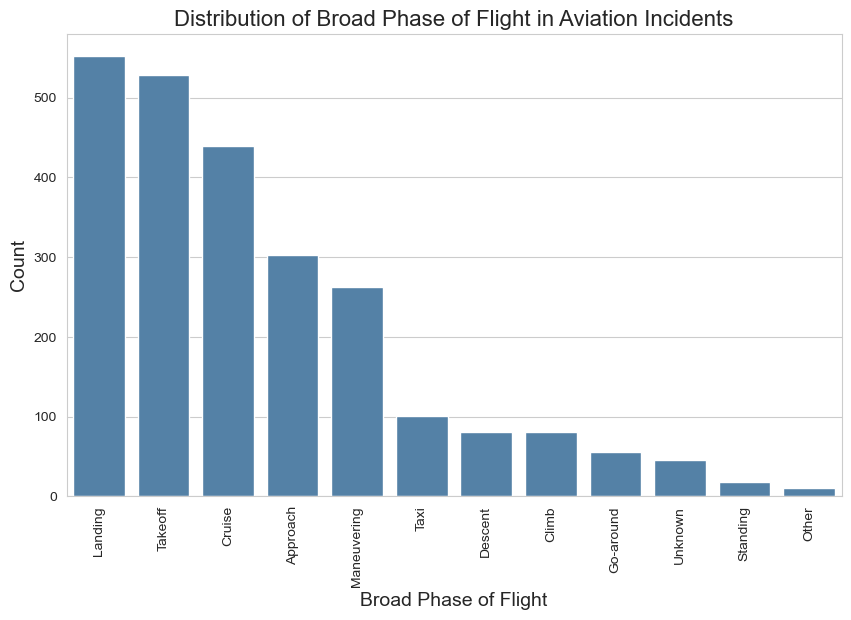

In [29]:
# Creating a bar plot for Broad Phase of Flight

plt.figure(figsize=(10, 6))
sns.countplot(data=Filtered_df, x='Broad_phase_of_flight', order=Filtered_df['Broad_phase_of_flight'].value_counts().index, color= 'steelblue')
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.rcParams['axes.facecolor'] = 'gainsboro'  # Set the background color
plt.rcParams['grid.color'] = 'white'          # Set the grid color
plt.title('Distribution of Broad Phase of Flight in Aviation Incidents', fontsize=16)
plt.xlabel('Broad Phase of Flight', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation = 90)
plt.show()


According to the plot, majority of the accidents take place during landing and takeoff.

### Engine Types in Aviation Incidents

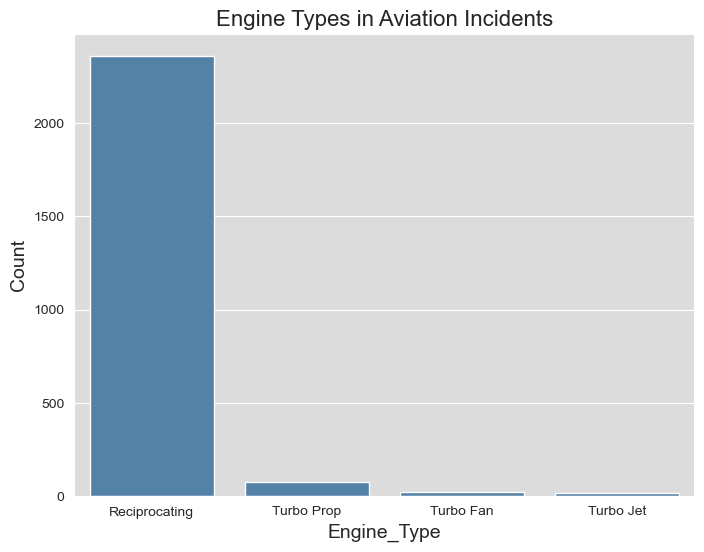

In [30]:
#Creating a barplot for Engine types

plt.figure(figsize=(8, 6))
sns.countplot(data=Filtered_df, x='Engine_Type', order=Filtered_df['Engine_Type'].value_counts().index, color = 'steelblue' )
plt.title('Engine Types in Aviation Incidents', fontsize=16)
plt.xlabel('Engine_Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks()
plt.show()


According to the plot, most accidents where recorded when the engine type was reciprocrating. The Turbo jet engines recorded the lowest number of accidents.

## Weather Conditions

Next we look at the weather conditions in our observations.

    -VMC (Visual Meteorological Conditions) refer to weather conditions that allow a pilot to fly visually, meaning they can rely on their eyesight to maintain safe separation from terrain and other aircraft.  

    -IMC (Instrument Meteorological Conditions) refer to weather conditions where visibility or cloud clearance is too low for safe visual flight.  Think of fog, heavy rain, or low clouds. Pilots flying in IMC  must rely on their instruments and adhere to Instrument Flight Rules (IFR) to navigate safely.

    -UNK refers to unknown weather conditions.

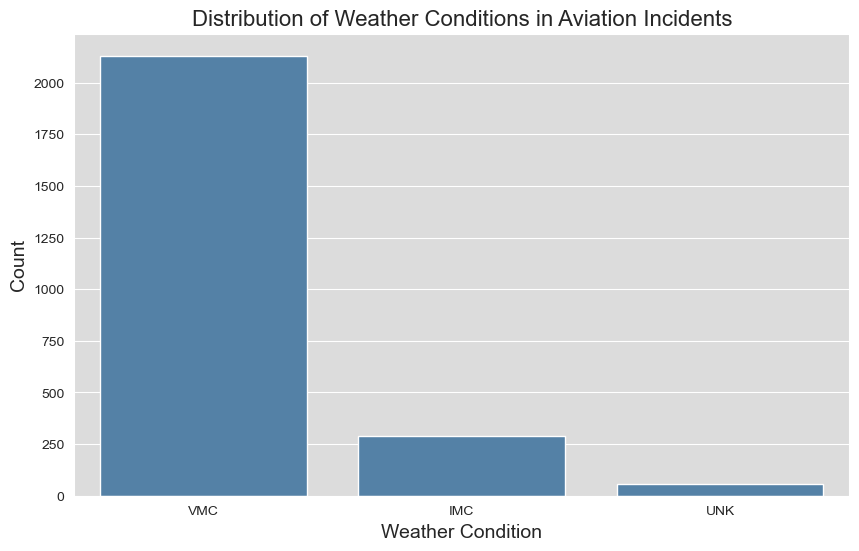

In [31]:
#Creating a barplot for distribution of weather conditions

plt.figure(figsize=(10, 6))
sns.countplot(data=Filtered_df, x='Weather_Condition', order=Filtered_df['Weather_Condition'].value_counts().index, color = 'steelblue')
plt.title('Distribution of Weather Conditions in Aviation Incidents', fontsize=16)
plt.xlabel('Weather Condition', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks()
plt.show()


According to our plot majority of the accidents take place during the VMC Weather

# Bivariate Plot Section

### Number of Engines and Total Fatal Injuries

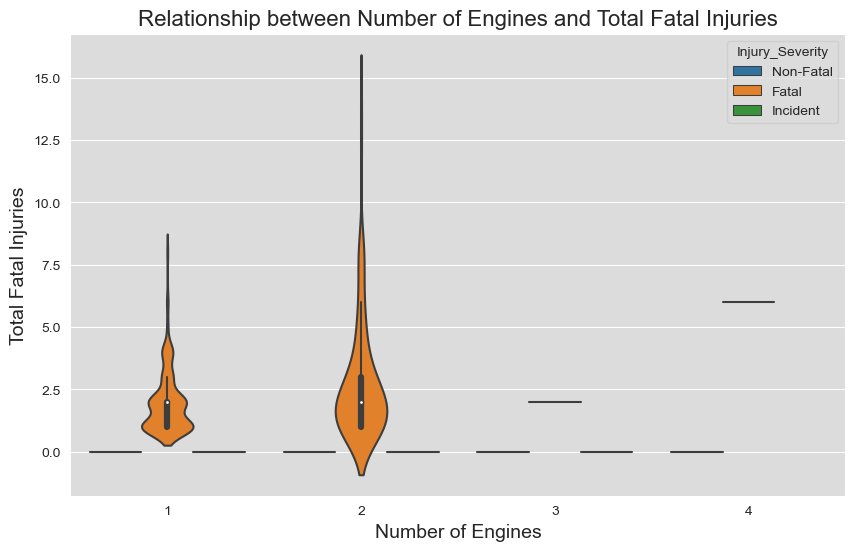

In [32]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=Filtered_df, y='Total_Fatal_Injuries', x='Number_of_Engines', hue = "Injury_Severity")
plt.title('Relationship between Number of Engines and Total Fatal Injuries', fontsize=16)
plt.xlabel('Number of Engines', fontsize=14)
plt.ylabel('Total Fatal Injuries', fontsize=14)
plt.show()


The width of each coloured shape indicates the frequency of occurence, hence airplanes with two engines experinced the most number of fatal injuries.

### Engine Types and Total Fatal Injuries

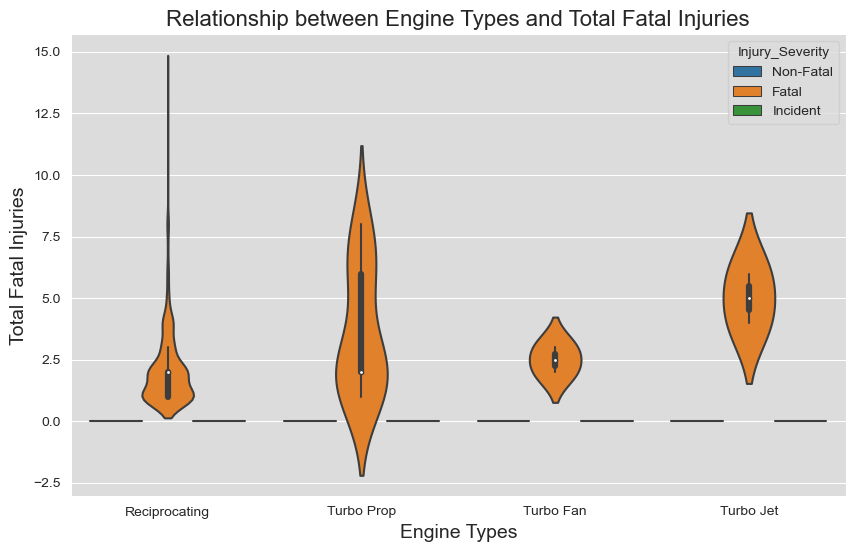

In [33]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=Filtered_df, y='Total_Fatal_Injuries', x='Engine_Type', hue = "Injury_Severity")
plt.title('Relationship between Engine Types and Total Fatal Injuries', fontsize=16)
plt.xlabel('Engine Types', fontsize=14)
plt.ylabel('Total Fatal Injuries', fontsize=14)
plt.show()


Reciprocating engines record the highest number of fatal injuries while the Turbo Fan engines have the lowest number of Fatal injuries.

### Number of Engines And Aircraft Damage

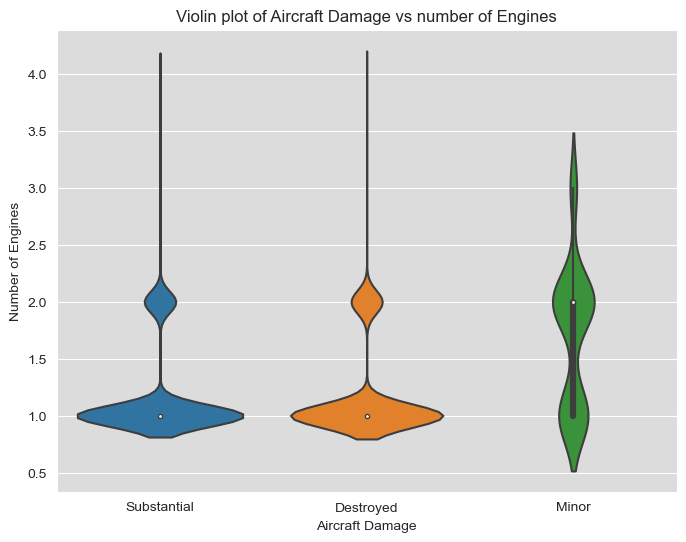

In [34]:
plt.figure(figsize=(8,6))
sns.violinplot(data=Filtered_df, y='Number_of_Engines', x='Aircraft_damage')
plt.title('Violin plot of Aircraft Damage vs number of Engines')
plt.ylabel('Number of Engines')
plt.xlabel('Aircraft Damage')
plt.show()


From the plot you can see that having airplanes with one or two engines, experience higher severity during accidents as they are assocaited with destroyed and substantial damage categories. Hence having fewer engines may result in higher damage during accidents. 

### Airplane Model vs Fatal Injuries

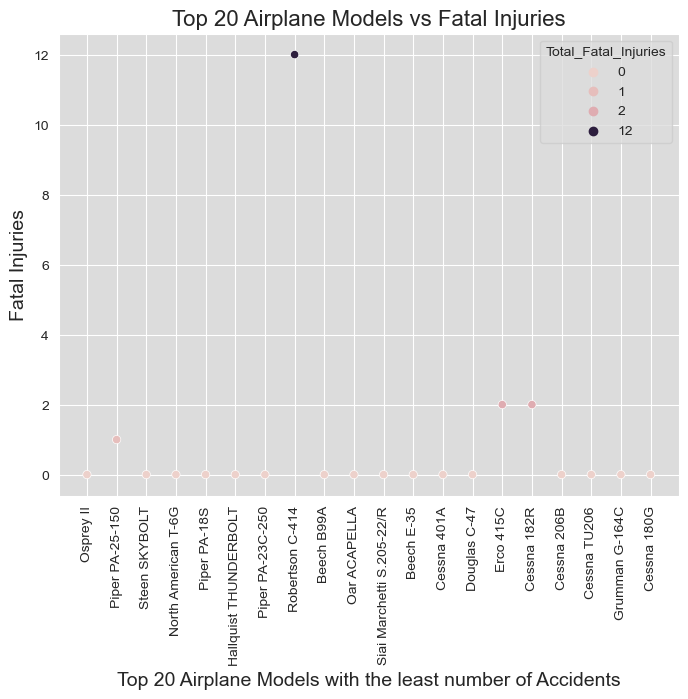

In [35]:
# Computing the counts of accidents for each airplane model

model_counts = Filtered_df['Airplane_Model'].value_counts()

# Identifying the top 20 airplane models with the least number of accidents
top_20_least_models = model_counts.nsmallest(20).index

# Filtering the DataFrame to only include these top 20 models
filtered_top_20_df = Filtered_df[Filtered_df['Airplane_Model'].isin(top_20_least_models)]

# Creating the plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_top_20_df, x='Airplane_Model', y = "Total_Fatal_Injuries", hue = "Total_Fatal_Injuries")
plt.title('Top 20 Airplane Models vs Fatal Injuries', fontsize=16)
plt.xlabel('Top 20 Airplane Models with the least number of Accidents', fontsize=14)
plt.ylabel('Fatal Injuries', fontsize=14)
plt.xticks(rotation=90)
plt.show()


This plot was meant to look into the top 20 airplanes with the least number of accidents. Piper PA -25-150, Robertson C- 414, Erco 415C and Cessna 182R. Despite them recording a small number of accidents. The accidents that were recorded had fatal injuries with ROBertson C-414 having the the most fatalities.

### Injury Severity Vs Purpose of Flight

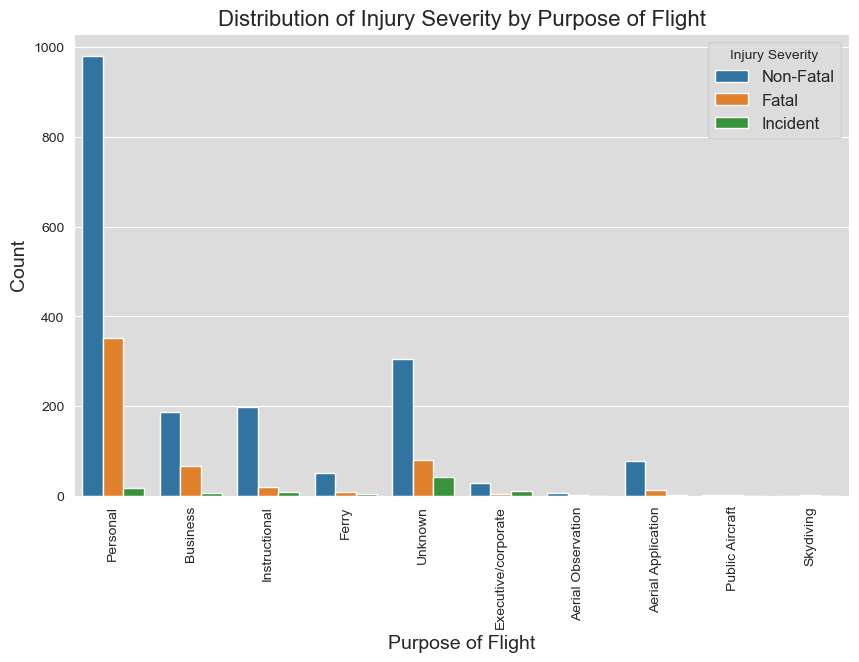

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(data=Filtered_df, x='Purpose_of_flight', hue='Injury_Severity')
plt.title('Distribution of Injury Severity by Purpose of Flight', fontsize=16)
plt.xlabel('Purpose of Flight', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation = 90)
plt.legend(title='Injury Severity', loc='upper right', fontsize=12)
plt.show()


From the plot you can see that, personal flights have a higher count for both non-fatal injuries and fatal outcomes compared to other purposes like ‘Business’ or ‘Instructional.’

# Conclusion

Conclusion
This notebook examined aircraft accident data to identify the safest options for the company's new aviation division. Here are the key takeaways:

    1. Accident Rates: While the analyzed aircraft ("top 20 with least accidents") had a lower overall accident frequency, some, like the Robertson C-414, exhibited a higher incidence of fatal accidents within those few occurrences.
    2. Engine Type: Reciprocating engines had the highest accident rates and fatalities, while turbofan engines had the lowest.
    3. Operation Purpose: Personal flights had a significantly higher risk of both non-fatal and fatal accidents compared to commercial or instructional purposes.
    4. Severity: Aircraft with one or two engines experienced more substantial damage during accidents.
    5. Landing/Takeoff: The majority of accidents occurred during takeoff and landing phases.
    6. Since most accidents happened during VMC, weather seems to have played a lesser role compared to other factors like engine type, operation purpose (personal flights being riskier), and number of engines.


# Recommendations

    1.Prioritize Turbofan Engines: When selecting aircraft, prioritize models with turbofan engines for their lower accident and fatality rates.
    2.Avoid Personal Use Focus: Initially, focus on commercial and instructional operations to mitigate risk associated with personal flights.
    3.Mitigate Takeoff/Landing Risks: Implement procedures and pilot training specifically focused on takeoff and landing safety protocols.
    4.Consider Multi-Engine Aircraft: While not a definitive safety guarantee, favoring aircraft with more than two engines might be a long-term consideration as the division matures.
  